In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys,inspect
sys.path.insert(0,"..") 
from glob import glob
from os.path import exists, join

import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm import tqdm
import torchvision

In [3]:
import datasets, datasets.xray

In [4]:
d_nih = datasets.NIH_Dataset(datadir="/lustre04/scratch/cohenjos/NIH/images-224",
                                      csvpath="/lustre03/project/6008064/jpcohen/ChestXray-NIHCC/Data_Entry_2017.csv")


In [5]:
d_nih

{'Atelectasis': [(0.0, 29103), (1.0, 1702)],
 'Cardiomegaly': [(0.0, 30038), (1.0, 767)],
 'Consolidation': [(0.0, 30378), (1.0, 427)],
 'Edema': [(0.0, 30723), (1.0, 82)],
 'Effusion': [(0.0, 29525), (1.0, 1280)],
 'Emphysema': [(0.0, 30540), (1.0, 265)],
 'Fibrosis': [(0.0, 30234), (1.0, 571)],
 'Hernia': [(0.0, 30722), (1.0, 83)],
 'Infiltration': [(0.0, 27201), (1.0, 3604)],
 'Mass': [(0.0, 29525), (1.0, 1280)],
 'Nodule': [(0.0, 29144), (1.0, 1661)],
 'Pleural_Thickening': [(0.0, 30042), (1.0, 763)],
 'Pneumonia': [(0.0, 30637), (1.0, 168)],
 'Pneumothorax': [(0.0, 30536), (1.0, 269)]}


NIH_XrayDataset num_samples=30805

In [6]:
d_nih.csv.iloc[0]

Patient ID                                    1
Image Index                    00000001_000.png
Finding Labels                     Cardiomegaly
Follow-up #                                   0
Patient Age                                058Y
Patient Gender                                M
View Position                                PA
OriginalImage[Width                        2682
Height]                                    2749
OriginalImagePixelSpacing[x               0.143
y]                                        0.143
Unnamed: 11                                 NaN
Name: 0, dtype: object

{'Atelectasis': 0.0,
 'Cardiomegaly': 1.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Hernia': 0.0,
 'Infiltration': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0}

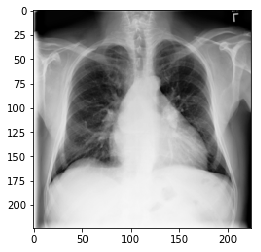

In [7]:
sample = d_nih[0]
plt.imshow(sample["PA"][0], cmap="Greys_r");
dict(zip(d_nih.pathologies,sample["lab"]))

In [8]:
#transform = torchvision.transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1))

In [9]:
d_pc = datasets.xray.PC_XrayDataset(#datadir="/lustre03/project/6008064/jpcohen/PADCHEST_SJ/images",
                                    datadir="/lustre04/scratch/cohenjos/PC/images-224",
                                    csvpath="/lustre03/project/6008064/jpcohen/PADCHEST_SJ/labels_csv/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv")


In [10]:
d_pc

{'Atelectasis': [(0.0, 59674), (1.0, 2441)],
 'Cardiomegaly': [(0.0, 56725), (1.0, 5390)],
 'Consolidation': [(0.0, 61621), (1.0, 494)],
 'Edema': [(0.0, 62007), (1.0, 108)],
 'Effusion': [(0.0, 60478), (1.0, 1637)],
 'Emphysema': [(0.0, 61569), (1.0, 546)],
 'Fibrosis': [(0.0, 61774), (1.0, 341)],
 'Fracture': [(0.0, 60450), (1.0, 1665)],
 'Hernia': [(0.0, 61127), (1.0, 988)],
 'Infiltration': [(0.0, 57677), (1.0, 4438)],
 'Mass': [(0.0, 61608), (1.0, 507)],
 'Nodule': [(0.0, 59921), (1.0, 2194)],
 'Pleural_Thickening': [(0.0, 60039), (1.0, 2076)],
 'Pneumonia': [(0.0, 60064), (1.0, 2051)],
 'Pneumothorax': [(0.0, 62017), (1.0, 98)]}


PC_XrayDataset num_samples=62115

In [85]:
sample["PA"].shape

(1, 224, 224)

In [150]:
tr = datasets.xray.XRayResizer(224)

In [135]:
data_transforms = torchvision.transforms.Compose([
        datasets.xray.ToPILImage(),
        torchvision.transforms.RandomAffine(45, translate=(0.15, 0.15), scale=(0.85, 1.15)),
        torchvision.transforms.ToTensor()
    ])

In [144]:
tr(sample["PA"]).astype(np.float32)

array([[[  518.  ,   469.8 ,   325.2 , ...,  -984.  ,  -984.  ,
          -992.  ],
        [  445.8 ,   309.2 ,   -60.25, ...,  -984.  ,  -984.  ,
          -992.  ],
        [  301.2 ,   -44.2 ,  -542.  , ...,  -992.  ,  -984.  ,
          -992.  ],
        ...,
        [ 1000.  ,   815.  ,   461.8 , ..., -1008.  , -1024.  ,
         -1024.  ],
        [ 1000.  ,   823.  ,   461.8 , ...,  -984.  , -1024.  ,
         -1024.  ],
        [ 1008.  ,   831.  ,   461.8 , ...,  -927.5 , -1024.  ,
         -1024.  ]]], dtype=float16)

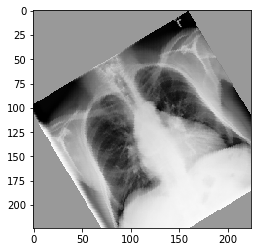

In [153]:
a = data_transforms(tr(sample["PA"]))
plt.imshow(a[0], cmap="Greys_r")

{'Atelectasis': 0.0,
 'Cardiomegaly': 0.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Effusion': 0.0,
 'Emphysema': 0.0,
 'Fibrosis': 0.0,
 'Fracture': 0.0,
 'Hernia': 0.0,
 'Infiltration': 0.0,
 'Mass': 0.0,
 'Nodule': 0.0,
 'Pleural_Thickening': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0}

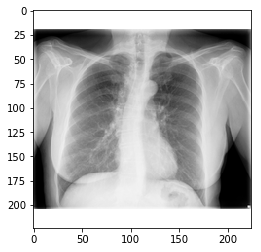

In [11]:
sample = d_pc[0]
plt.imshow(sample["PA"][0], cmap="Greys_r");
dict(zip(d_pc.pathologies,sample["lab"]))

In [12]:
d_chex = datasets.xray.CheX_XrayDataset(datadir="/lustre03/project/6008064/jpcohen/chexpert/CheXpert-v1.0-small",
                                        csvpath="/lustre03/project/6008064/jpcohen/chexpert/CheXpert-v1.0-small/train.csv")


In [13]:
d_chex

{'Atelectasis': [(0.0, 14317), (1.0, 12691)],
 'Cardiomegaly': [(0.0, 17765), (1.0, 9099)],
 'Consolidation': [(0.0, 22504), (1.0, 5390)],
 'Edema': [(0.0, 20615), (1.0, 14929)],
 'Effusion': [(0.0, 23500), (1.0, 20640)],
 'Enlarged Cardiomediastinum': [(0.0, 20506), (1.0, 5181)],
 'Fracture': [(0.0, 14948), (1.0, 4250)],
 'Lung Lesion': [(0.0, 14422), (1.0, 4217)],
 'Lung Opacity': [(1.0, 30873), (0.0, 15675)],
 'Pleural Other': [(0.0, 14086), (1.0, 1572)],
 'Pneumonia': [(0.0, 14793), (1.0, 2822)],
 'Pneumothorax': [(0.0, 32685), (1.0, 4311)],
 'Support Devices': [(1.0, 25883), (0.0, 15734)]}


CheX_XrayDataset num_samples=64534

In [17]:
d_chex.csv.loc[0]

PatientID                                                          patient00001
Path                          CheXpert-v1.0-small/train/patient00001/study1/...
Sex                                                                      Female
Age                                                                          68
Frontal/Lateral                                                         Frontal
AP/PA                                                                        AP
No Finding                                                                    1
Enlarged Cardiomediastinum                                                    0
Cardiomegaly                                                                  0
Lung Opacity                                                                  0
Lung Lesion                                                                   0
Edema                                                                         0
Consolidation                           

{'Atelectasis': 0.0,
 'Cardiomegaly': 0.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Enlarged Cardiomediastinum': 0.0,
 'Fracture': 0.0,
 'Lung Lesion': 0.0,
 'Lung Opacity': 0.0,
 'Effusion': 0.0,
 'Pleural Other': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0,
 'Support Devices': 0.0}

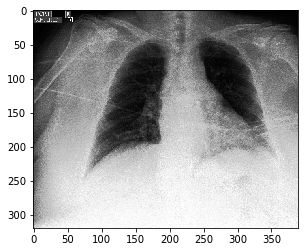

In [14]:
sample = d_chex[0]
plt.imshow(sample["PA"][0], cmap="Greys_r");
dict(zip(d_chex.pathologies,sample["lab"]))

In [34]:
d_nih2 = datasets.xray.NIH_Google_XrayDataset(datadir="/lustre04/scratch/cohenjos/NIH/images-224",
                                      csvpath="google_labels.csv")


In [35]:
d_nih2

{'Fracture': [(0.0, 1635), (1.0, 60)],
 'Lung Opacity': [(0.0, 1094), (1.0, 601)],
 'Nodule or mass': [(0.0, 1463), (1.0, 232)],
 'Pneumothorax': [(0.0, 1623), (1.0, 72)]}


NIH_Google_XrayDataset num_samples=1695

{'Atelectasis': 1.0,
 'Consolidation': 0.0,
 'Infiltration': 0.0,
 'Pneumothorax': 0.0}

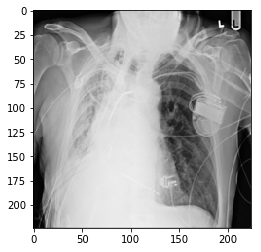

In [39]:
sample = d_nih2[0]
plt.imshow(sample["PA"][0], cmap="Greys_r");
dict(zip(d_nih.pathologies,sample["lab"]))

In [4]:
d_mimic_chex = datasets.xray.MIMIC_XrayDataset(#datadir="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/files",
          datadir="/lustre04/scratch/cohenjos/MIMIC/images-224/files",
          csvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-chexpert.csv.gz",
          metacsvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-metadata.csv.gz")


In [5]:
d_mimic_chex

{'Atelectasis': [(0.0, 30954), (1.0, 4077)],
 'Cardiomegaly': [(0.0, 32312), (1.0, 3743)],
 'Consolidation': [(0.0, 32297), (1.0, 816)],
 'Edema': [(0.0, 33610), (1.0, 1157)],
 'Effusion': [(0.0, 33401), (1.0, 3713)],
 'Enlarged Cardiomediastinum': [(0.0, 31505), (1.0, 692)],
 'Fracture': [(0.0, 30961), (1.0, 972)],
 'Lung Lesion': [(0.0, 31033), (1.0, 1321)],
 'Lung Opacity': [(0.0, 31175), (1.0, 5426)],
 'Pleural Other': [(0.0, 30869), (1.0, 465)],
 'Pneumonia': [(0.0, 33347), (1.0, 2176)],
 'Pneumothorax': [(0.0, 33651), (1.0, 560)],
 'Support Devices': [(0.0, 31152), (1.0, 1970)]}


MIMIC_XrayDataset num_samples=45628

In [6]:
d_mimic_chex.csv.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,dicom_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
1,10000898,50771383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2a280266-c8bae121-54d75383-cac046f4-ca37aa16,CHEST (PA AND LAT),PA,2544,3056,21880312,125501.842,CHEST (PA AND LAT),postero-anterior,Erect
2,10000935,55697293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,c50494f1-90e2bff5-e9189550-1a4562fd-6ab5204c,NaN,PA,2022,1840,21870226,85443.000,CHEST (PA AND LAT),postero-anterior,Erect
3,10000980,50985099,NaN,1.0,-1.0,0.0,NaN,NaN,NaN,NaN,...,6ad03ed1-97ee17ee-9cf8b320-f7011003-cd93b42d,CHEST (PA AND LAT),PA,2022,1870,21910917,130354.000,CHEST (PA AND LAT),postero-anterior,Erect
4,10001038,58224503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28fad2ac-d6001216-b4f72c5b-2d4d452e-17b6c9a5,CHEST (PA AND LAT),PA,3056,2544,21490807,90708.109,CHEST (PA AND LAT),postero-anterior,Erect


In [21]:
#d_mimic_chex.csv.loc[0]

In [7]:
d_mimic_negbio = datasets.xray.MIMIC_XrayDataset(#datadir="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/files",
          datadir="/lustre04/scratch/cohenjos/MIMIC/images-224/files",
          csvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-negbio.csv.gz",
          metacsvpath="/lustre03/project/6008064/jpcohen/MIMICCXR-2.0/mimic-cxr-2.0.0-metadata.csv.gz")


In [8]:
d_mimic_negbio

{'Atelectasis': [(0.0, 32058), (1.0, 4048)],
 'Cardiomegaly': [(0.0, 33431), (1.0, 3275)],
 'Consolidation': [(0.0, 33564), (1.0, 762)],
 'Edema': [(0.0, 34731), (1.0, 1121)],
 'Effusion': [(0.0, 34489), (1.0, 3595)],
 'Enlarged Cardiomediastinum': [(0.0, 32641), (1.0, 660)],
 'Fracture': [(0.0, 32320), (1.0, 696)],
 'Lung Lesion': [(0.0, 32187), (1.0, 1271)],
 'Lung Opacity': [(0.0, 32371), (1.0, 5301)],
 'Pleural Other': [(0.0, 32012), (1.0, 450)],
 'Pneumonia': [(0.0, 34479), (1.0, 2042)],
 'Pneumothorax': [(0.0, 34760), (1.0, 500)],
 'Support Devices': [(0.0, 32267), (1.0, 1856)]}


MIMIC_XrayDataset num_samples=45628

In [ ]:
np.nan

In [25]:
dissagreement.shape[0]

45628

In [31]:
np.unique(d_mimic_chex.labels)

array([ 0.,  1., nan, ..., nan, nan, nan], dtype=float32)

In [34]:
d_mimic_chex.labels[np.isnan(d_mimic_chex.labels)] = 3
d_mimic_negbio.labels[np.isnan(d_mimic_negbio.labels)] = 3

In [36]:
(d_mimic_chex.labels == d_mimic_negbio.labels).sum()

575906

In [48]:
dissagreement = ((d_mimic_chex.labels + d_mimic_negbio.labels) == 1)

In [49]:
dissagreement.sum(0).max()

275

In [50]:
dict(zip(d_mimic_chex.pathologies,dissagreement.sum(0)))

{'Atelectasis': 139,
 'Cardiomegaly': 90,
 'Consolidation': 35,
 'Edema': 43,
 'Enlarged Cardiomediastinum': 27,
 'Fracture': 275,
 'Lung Lesion': 43,
 'Lung Opacity': 150,
 'Effusion': 93,
 'Pleural Other': 14,
 'Pneumonia': 109,
 'Pneumothorax': 49,
 'Support Devices': 85}

In [51]:
275/dissagreement.shape[0]

0.006027000964320154

In [52]:
d_mimic_chex.csv

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,dicom_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
1,10000898,50771383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2a280266-c8bae121-54d75383-cac046f4-ca37aa16,CHEST (PA AND LAT),PA,2544,3056,21880312,125501.842,CHEST (PA AND LAT),postero-anterior,Erect
2,10000935,55697293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,c50494f1-90e2bff5-e9189550-1a4562fd-6ab5204c,NaN,PA,2022,1840,21870226,85443.000,CHEST (PA AND LAT),postero-anterior,Erect
3,10000980,50985099,NaN,1.0,-1.0,0.0,NaN,NaN,NaN,NaN,...,6ad03ed1-97ee17ee-9cf8b320-f7011003-cd93b42d,CHEST (PA AND LAT),PA,2022,1870,21910917,130354.000,CHEST (PA AND LAT),postero-anterior,Erect
4,10001038,58224503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28fad2ac-d6001216-b4f72c5b-2d4d452e-17b6c9a5,CHEST (PA AND LAT),PA,3056,2544,21490807,90708.109,CHEST (PA AND LAT),postero-anterior,Erect
5,10001176,53186264,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,1fe73f8e-036bd24e-4578c891-33c1746e-864884a7,CHEST (PA AND LAT),PA,3056,2544,21861128,214432.531,CHEST (PA AND LAT),postero-anterior,Erect
6,10001217,52067803,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,a917c883-720a5bbf-02c84fc6-98ad00ac-c562ff80,CHEST (PA AND LAT),PA,3056,2544,21571118,185118.703,CHEST (PA AND LAT),postero-anterior,Erect
7,10001401,51065211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8061113f-c019f3ae-fd1b7c54-33e8690d-be838099,CHEST (PA AND LAT),PA,3056,2544,21310619,193047.156,CHEST (PA AND LAT),postero-anterior,Erect
8,10001851,59664767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,edb88e4a-c04f1be7-aefcf3e0-8889542d-692ff7fd,CHEST (PA AND LAT),PA,2884,2441,21250314,195520.546,CHEST (PA AND LAT),postero-anterior,Erect
9,10001884,50279568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3892f17f-8fa034e8-e9b81865-01c48bbb-b9452626,CHEST (PA AND LAT),PA,3056,2544,21300623,191501.093,CHEST (PA AND LAT),postero-anterior,Erect


{'Atelectasis': 0.0,
 'Cardiomegaly': 0.0,
 'Consolidation': 0.0,
 'Edema': 0.0,
 'Enlarged Cardiomediastinum': 0.0,
 'Fracture': 0.0,
 'Lung Lesion': 0.0,
 'Lung Opacity': 0.0,
 'Effusion': 0.0,
 'Pleural Other': 0.0,
 'Pneumonia': 0.0,
 'Pneumothorax': 0.0,
 'Support Devices': 0.0}

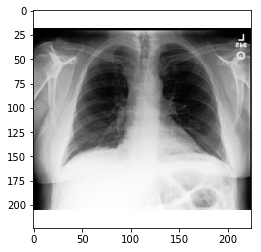

In [102]:
sample = d_mimic_chex[15011]
plt.imshow(sample["PA"][0], cmap="Greys_r");
dict(zip(d_mimic_chex.pathologies,sample["lab"]))

In [5]:
import torchvision, torchvision.transforms
transforms = torchvision.transforms.Compose([datasets.xray.XRayCenterCrop(),datasets.xray.XRayResizer(224)])

In [8]:
d_openi = datasets.xray.Openi_XrayDataset(#datadir="/lustre03/project/6008064/jpcohen/OpenI/NLMCXR_png/images/",
            datadir=os.path.join(os.getenv('SLURM_TMPDIR'), "OpenI"),
            xmlpath="/lustre03/project/6008064/jpcohen/OpenI/ecgen-radiology/",
            transform=transforms)

In [ ]:
import os,sys,inspect
sys.path.insert(0,"..") 
from glob import glob
from os.path import exists, join
import torch
import train_utils
import argparse
import skimage.transform
import sklearn.metrics
import models, models.densenet
import datasets, datasets.xray
import torchvision
import torch.nn
import pickle
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [7]:
model = torch.load("/home/cohenjos/scratch/concept-embedding2/nihpcchexmimic_chmimic_nbgoogle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt")


In [13]:
# for i in range(100):
#     plt.imshow(d_openi[i]["PA"][0])
#     plt.show()

In [8]:
feats = []
for i in range(len(d_openi)):
    out = model.features(torch.from_numpy(d_openi[i]["PA"]).unsqueeze(0).cuda())
    out = F.relu(out, inplace=True)
    out = F.adaptive_avg_pool2d(out, (1, 1))
    feats.append(out.cpu().detach().numpy().reshape(-1))
feats = np.asarray(feats)

FileNotFoundError: [Errno 2] No such file or directory: '/localscratch/cohenjos.5009218.0/OpenI/CXR1_1_IM-0001-3001.png'

In [100]:
feats.shape

(3812, 1024)

In [101]:
import sklearn, sklearn.manifold
X_embedded = sklearn.manifold.TSNE(n_components=2).fit_transform(feats)
X_embedded.shape

(3812, 2)

In [39]:
# import umap
# reducer = umap.UMAP()
# X_embedded = reducer.fit_transform(feats)
# X_embedded.shape

(100, 2)

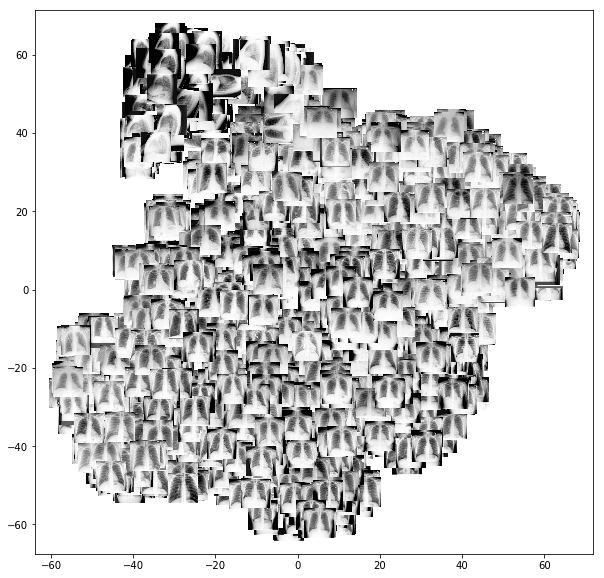

In [102]:
trans = datasets.xray.XRayResizer(30)
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig, ax = plt.subplots(figsize=(10, 10))
for item in range(X_embedded.shape[0]):
    ax.scatter(X_embedded[item,0], X_embedded[item,1])
    #plt.annotate(str(item),(X_embedded[item,0], X_embedded[item,1]))
    #img = OffsetImage(plt.imread(d_openi.datadir +  "/" + d_openi.csv.iloc[57].imageid + ".png"))
    ab = AnnotationBbox(OffsetImage(trans(d_openi[item]["PA"])[0], cmap="Greys_r"), 
                        (X_embedded[item,0], X_embedded[item,1]), frameon=False)
    ax.add_artist(ab)
    #ax.show()
    

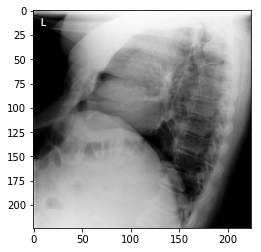

In [62]:
sample = d_openi[57]
plt.imshow(sample["PA"][0], cmap="Greys_r");
#dict(zip(d_openi.pathologies,sample["lab"]))

In [15]:
pathologies = [  'Atelectasis',
                 'Consolidation',
                 'Infiltration',
                 'Pneumothorax',
                 'Edema',
                 'Emphysema',
                 'Fibrosis',
                 'Effusion',
                 'Pneumonia',
                 'Pleural_Thickening',
                 'Cardiomegaly',
                 'Nodule',
                 'Mass',
                 'Hernia',
                 'Lung Lesion',
                 'Fracture',
                 'Lung Opacity',
                 'Enlarged Cardiomediastinum'
                ]

In [16]:
print(d_nih.__class__)
datasets.xray.relabel_dataset(pathologies, d_nih)
print(d_pc.__class__)
datasets.xray.relabel_dataset(pathologies, d_pc)
print(d_chex.__class__)
datasets.xray.relabel_dataset(pathologies, d_chex)

<class 'datasets.xray.NIH_XrayDataset'>
Lung Lesion doesn't exist. Adding nans instead.
Fracture doesn't exist. Adding nans instead.
Lung Opacity doesn't exist. Adding nans instead.
Enlarged Cardiomediastinum doesn't exist. Adding nans instead.
<class 'datasets.xray.PC_XrayDataset'>
Lung Lesion doesn't exist. Adding nans instead.
Lung Opacity doesn't exist. Adding nans instead.
Enlarged Cardiomediastinum doesn't exist. Adding nans instead.
<class 'datasets.xray.CheX_XrayDataset'>
{'Pleural Other', 'Support Devices'} will be dropped
Infiltration doesn't exist. Adding nans instead.
Emphysema doesn't exist. Adding nans instead.
Fibrosis doesn't exist. Adding nans instead.
Pleural_Thickening doesn't exist. Adding nans instead.
Nodule doesn't exist. Adding nans instead.
Mass doesn't exist. Adding nans instead.
Hernia doesn't exist. Adding nans instead.


In [ ]:
img, lab = d_chex[1]
plt.imshow(img[0], cmap="Greys_r");
dict(zip(d_chex.pathologies,lab))

In [ ]:
img, lab = d_nih[0]
plt.imshow(img[0], cmap="Greys_r");
dict(zip(d_nih.pathologies,lab))

In [ ]:
dd = datasets.xray.Merge_XrayDataset([d_nih, d_pc, d_chex])

In [ ]:
dd